# Examples for PZModels

In [1]:
import os
import sys

import numpy as np

import pyda
from pyda.tsdata import TSData
from pyda.pzmodel import *
from pyda.dsp.spectral import logpsd
import numpy
from pyda.dsp.noisegen import NoiseGen

FigSize = (15,10) # global setting for figure size

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

## Create PZModel

In [3]:
poles = [0.1]
zeros = PZ(1)
pzm = PZModel(poles=poles, zeros=zeros, gain=2, delay=0)

## Plot response

In [4]:

r = pzm.resp(freqs=numpy.logspace(start=-3, stop=1, num=100))
# r.loglog()

<class 'numpy.ndarray'>


## More complex model

In [5]:
poles = [PZ(0.1, 2)]
zeros = PZ(1)
pzm = PZModel(poles=poles, zeros=zeros, gain=1, delay=0)
r = pzm.resp(freqs=numpy.logspace(start=-3, stop=1, num=100))
# r.loglog()

<class 'numpy.ndarray'>


## Just delay

In [6]:
pzm = PZModel(gain=2, delay=1)
r = pzm.resp(freqs=numpy.logspace(start=-3, stop=1, num=100))
# h = r.loglog()
# h[1][0].set_ylim(0.1, 10)

<class 'numpy.ndarray'>


## Noise model

In [11]:

poles = [PZ(0.01,2), PZ(3)]
zeros = [PZ(0.1), PZ(0.2)]
pzm = PZModel(poles=poles, zeros=zeros, gain=2, delay=0)
pzm.ounits = "m"
pzm.name = "system"
print(pzm)


<class 'numpy.ndarray'>
<class 'float'>
<class 'float'>
<class 'float'>
-------- PZModel ---------
  name: system
  desc: system
  gain: 2
 delay: 0
iunits: []
ounits: [m]
pole00 = (f=0.01 Hz, Q=2, ri=[-0.01570796+0.06083668j -0.01570796-0.06083668j])
pole01 = (f=3 Hz, Q=nan, ri=-18.84955592153876)
zero02 = (f=0.1 Hz, Q=nan, ri=-0.6283185307179586)
zero03 = (f=0.2 Hz, Q=nan, ri=-1.2566370614359172)

-----------------------------


## Generate noise

/Users/hewitson/working/pyda/pyda/dsp/noisegen.py:218: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m_p, resid, rank, s = numpy.linalg.lstsq(m_d, m_q)


* computing lpsd of system ...
computing frequency 0 of 565: 1e-05 Hz
computing frequency 100 of 565: 0.018253178505967603 Hz
computing frequency 200 of 565: 0.08355291529729576 Hz
computing frequency 300 of 565: 0.3463965783340988 Hz
computing frequency 400 of 565: 1.4361067529015232 Hz
computing frequency 500 of 565: 5.95408796466995 Hz
<class 'numpy.ndarray'>


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{m}}}{\\,{\\sqrt{\\mathrm{Hz}}}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

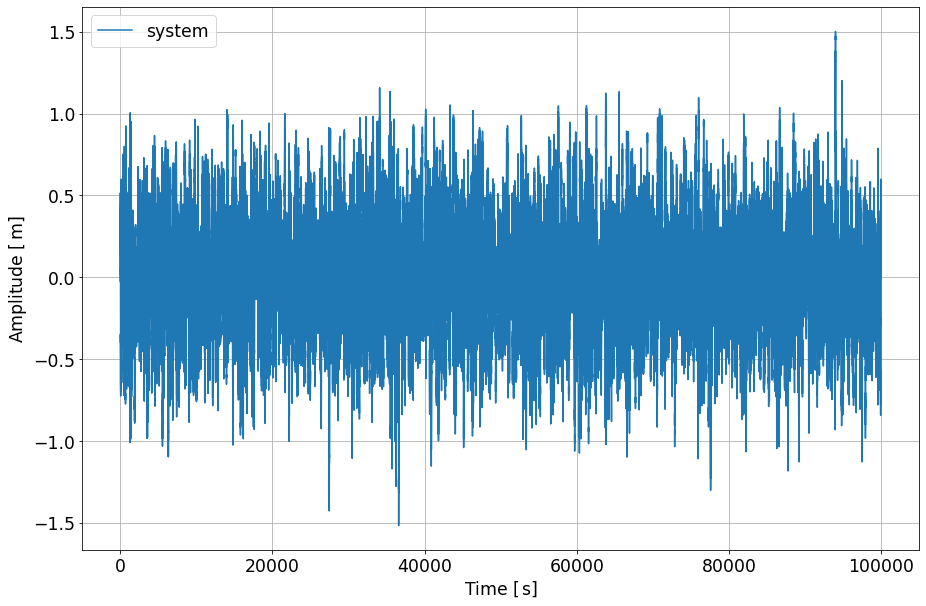

<Figure size 1080x720 with 0 Axes>

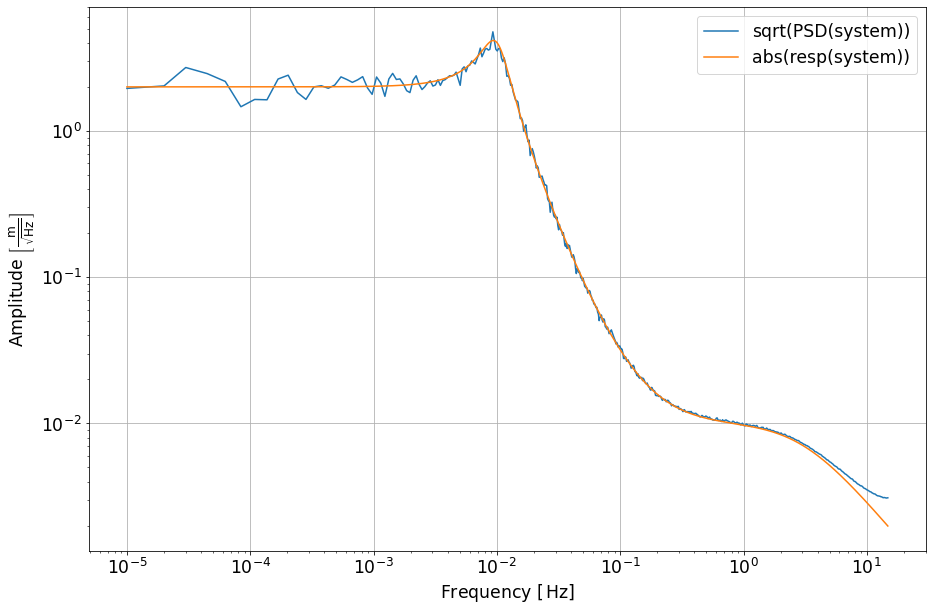

In [13]:

ng = NoiseGen(pzm=pzm, fs=30)
ts = ng.generateNoise(1e5)
ts.plot()

S = logpsd(ts)
r = pzm.resp(freqs = S.xaxis.data)
S.sqrt().loglog(r.abs())
